# <p style="text-align:center"> Proyecto Módulo 2 </p>
 <p style="text-align:center"> Eugenia Ruiz Ramos <br> 
                                Irma López González  <br>
                                Alberto Olvera Trejo</p>


In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [153]:
df = pd.read_csv("ForbesRichestAtheletes.csv")
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


Notamos que el nombre Aaaron Rodger está mal escrito y que tenemos que limpiar la columna *Previous Year Rank" 

In [154]:
#Eliminamos la columna del ID
df.drop(columns=['S.NO'], inplace = True)

In [155]:
df['Previous Year Rank'].unique()

array([nan, '8', '1', '>30', '4', '5', '12', '6', '3', '9', '17', '13',
       '10', '>40', '19', '40', '7', '11', '30', '22', '20', 'not ranked',
       '38', '2', '15', '14', '26', 'none', '18', '>10', '>20', '?', '24',
       '21', '>14', '>100', '??'], dtype=object)

In [156]:
df["Name"].unique()

array(['Mike Tyson', 'Buster Douglas', 'Sugar Ray Leonard',
       'Ayrton Senna', 'Alain Prost', 'Jack Nicklaus', 'Greg Norman',
       'Michael Jordan', 'Arnold Palmer', 'Evander Holyfield',
       'George Foreman', 'Donovan "Razor" Ruddock', 'Nigel Mansell',
       'Andre Agassi', 'Joe Montana', 'Jim Courier', 'Monica Seles',
       'Riddick Bowe', "Shaquille O'Neal", 'Lennox Lewis',
       'Cecil Fielder', "Shaq O'Neal", 'Gerhard Berger', 'Wayne Gretzky',
       'Michael Moorer', 'Deion Sanders', 'Michael Schumacher',
       'Emmit Smith', 'Dennis Rodman', 'Patrick Ewing',
       'Oscar De La Hoya', 'Tiger Woods', 'Dale Earnhardt', 'Joe Sakic',
       'Grant Hill', 'Sergei Federov', 'Gary Sheffield', 'Kevin Garnett',
       'Kobe Bryant', 'Jacques Villeneuve', 'Jeff Gordon',
       'Alex Rodriguez', 'Peyton Manning', 'David Beckham',
       'Michael Vick', 'Lance Armstrong', 'Valentino Rossi',
       'Muhammad Ali', 'Phil Mickelson', 'Tom Brady', 'Kimi Raikkonen',
       'Ronaldinh

En la columna *Nationality* se repite el valor *Philippines* pero mal escrito

In [157]:
for nationality in df['Nationality'].unique():
    print( nationality)

USA
Brazil
France
Australia
Canada
UK
Austria
Germany
Russia
Italy
Finland
Switzerland
Philippines
Portugal
Dominican
Argentina
Filipino
Spain
Serbia
Northern Ireland
Ireland
Mexico


In [158]:
#Reemplazamos los NaN
df["Previous Year Rank"] = df["Previous Year Rank"].fillna('0')

#Creamos una funcion para reemplazar los valores de Previous Year Rank
def replace_all(variable, dic):
    for orig, rep in dic.items():
        variable = variable.replace(orig, rep)
    return variable

#Creamos un diccionario para usar la funcion replace_all
s_rename=dict({'>100':'101',
'>40':'41',
'>20':'21',
'>14':'15',
'>30':'31',
'>10':'11',
'?':'-1',
'??':'-1',
'none':'-2',
'not ranked':'0'
})

#Diccionario para el jugador Aaron Rodgers
name = {"Aaron Rogers" : "Aaron Rodgers"}

country = {'Filipino' : 'Philippines'}

df['Previous Year Rank']=replace_all(df['Previous Year Rank'],s_rename)

#Aplicamos la funcion
df['Previous Year Rank']=replace_all(df['Previous Year Rank'],s_rename)
df['Name'] = replace_all(df['Name'], name)
df['Nationality'] = replace_all(df['Nationality'], country)

In [159]:
df["Sport"] = df["Sport"].astype("category")
df["Nationality"] = df["Nationality"].astype("category")
df["Previous Year Rank"] = df["Previous Year Rank"].astype("int")
df["Current Rank"] = df["Current Rank"].astype("int")

df["Sport"] = df["Sport"].str.lower()

In [160]:
paises = [pais for pais, _ in df["Nationality"].value_counts().items()]
registros = [registro for _, registro in df["Nationality"].value_counts().items()]

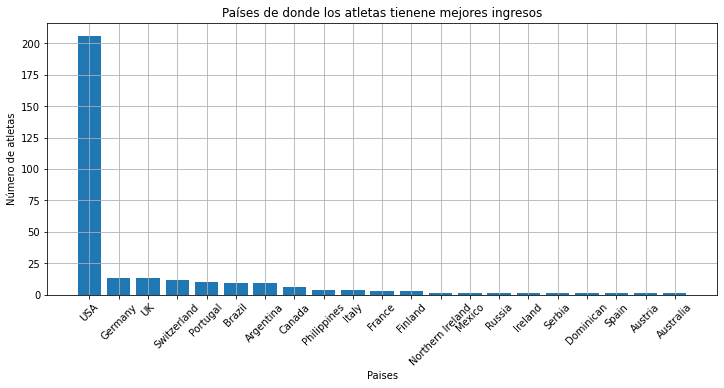

In [161]:
fig, ax = plt.subplots(figsize = (12, 5))
plt.bar(paises, registros)
plt.xticks(rotation = 45)
plt.grid(True)
plt.title("Países de donde los atletas tienene mejores ingresos")
plt.xlabel("Paises")
plt.ylabel("Número de atletas")
plt.show()

In [162]:
bars_color = df.groupby(["Sport", "Nationality"]).count()
bars_color = bars_color.fillna(0)

colors = bars_color.pivot_table(index = ["Nationality"], columns = "Sport", values = "Current Rank")

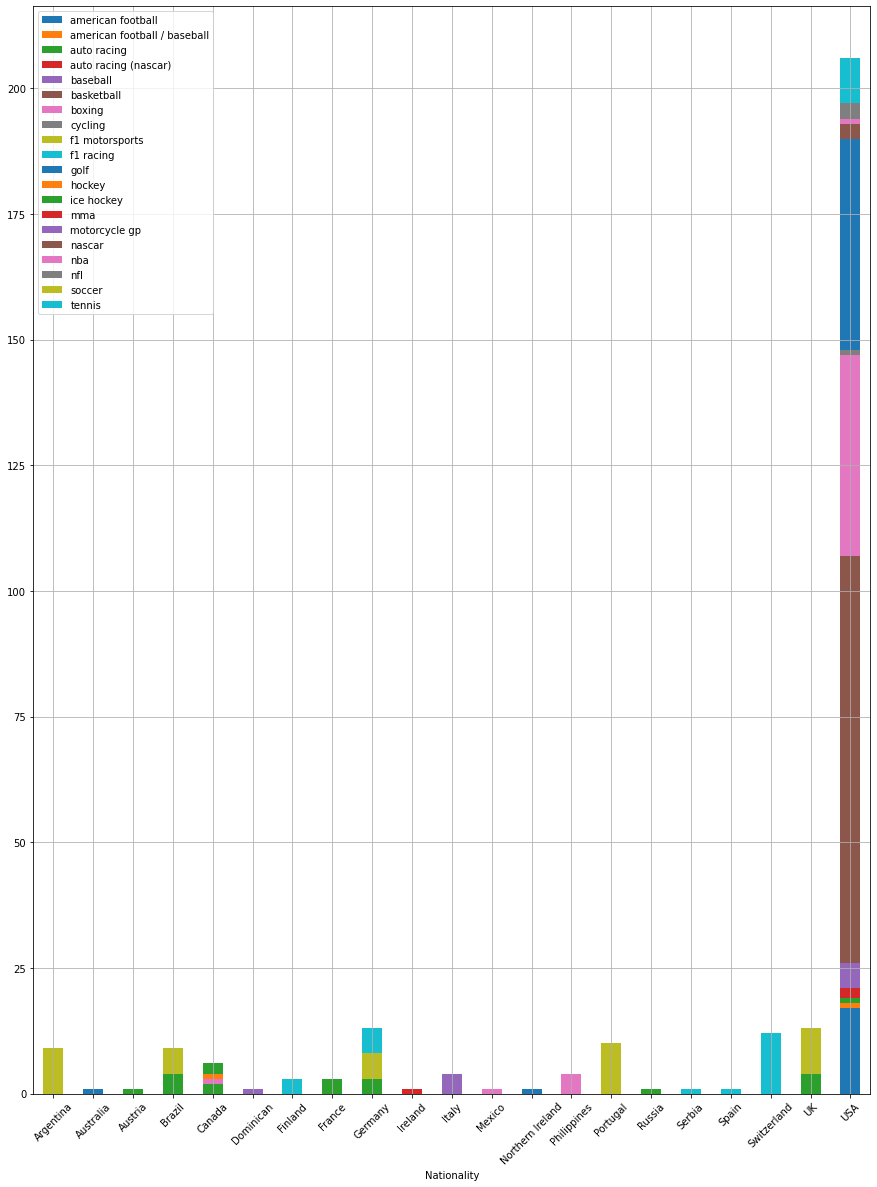

In [163]:
# fig, ax = plt.subplots(figsize = (12, 5))
colors.plot.bar(stacked = True, rot = 45, figsize = (15, 20))
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

# Atletas que subieron por lo menos dos lugares en el rango desde 2010 hasta 2020

In [306]:
#subieron al menos dos niveles 2010 y 2020
ranked_10_20=df[df['Year']>=2010].loc[:,('Name','Current Rank','Previous Year Rank', 'Year', 'Sport', 'earnings ($ million)')]
ranked_10_20

,Name,Current Rank,Previous Year Rank,Year,Sport,earnings ($ million)
191,Tiger Woods,1,1,2010,golf,105.0
192,Floyd Mayweather,2,11,2010,boxing,65.0
193,Kobe Bryant,3,2,2010,basketball,48.0
194,Phil Mickelson,4,6,2010,golf,46.0
195,David Beckham,5,5,2010,soccer,43.7
...,...,...,...,...,...,...
296,Stephen Curry,6,9,2020,basketball,74.4
297,Kevin Durant,7,10,2020,basketball,63.9
298,Tiger Woods,8,11,2020,golf,62.3
299,Kirk Cousins,9,101,2020,american football,60.5


In [165]:
ranked = ranked_10_20[ranked_10_20['Previous Year Rank'] - 2 >= ranked_10_20['Current Rank']]
ranked['Name'].unique()

array(['Floyd Mayweather', 'Phil Mickelson', 'Roger Federer',
       'Eli Manning', 'LeBron James', 'Cristiano Ronaldo',
       'Alex Rodriguez', 'Michael Schumacher', 'Lionel Messi',
       'Manny Pacquiao', 'Tiger Woods', 'Kobe Bryant', 'Rafael Nadal',
       'Matt Ryan', 'Kevin Durant', 'Novak Djokovic', 'Cam Newton',
       'Jordan Spieth', 'Rory McIlroy', 'Conor McGregor', 'Neymar',
       'Matthew Stafford', 'Canelo Alvarez', 'Stephen Curry',
       'Kirk Cousins', 'Carson Wentz'], dtype=object)

# Atleta con el menor número de apariciones y mayores ganancias

In [166]:
df['Name'].value_counts()

one = []

for athelet, count in df['Name'].value_counts().items():
    if count == 1:
        one.append(athelet)

In [167]:
df.groupby("Name").count()


,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
Name,,,,,,
Aaron Rodgers,2,2,2,2,2,2
Alain Prost,3,3,3,3,3,3
Alex Rodriguez,4,4,4,4,4,4
Andre Agassi,6,6,6,6,6,6
Andrew Luck,1,1,1,1,1,1
...,...,...,...,...,...,...
Terrell Suggs,1,1,1,1,1,1
Tiger Woods,19,19,19,19,19,19
Tom Brady,1,1,1,1,1,1


In [168]:
df_one = df[df['Name'].isin(one)]
df_one[df_one['earnings ($ million)'] == df_one['earnings ($ million)'].max()]

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
274,Conor McGregor,Ireland,4,24,mma,2018,99.0


# Deporte y país con mayor número de atletas no rankeados que entraron en la lista de atletas mejor pagados

In [170]:
no_rank = df[df['Previous Year Rank'] == 0]
no_rank

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,Mike Tyson,USA,1,0,boxing,1990,28.6
1,Buster Douglas,USA,2,0,boxing,1990,26.0
2,Sugar Ray Leonard,USA,3,0,boxing,1990,13.0
3,Ayrton Senna,Brazil,4,0,auto racing,1990,10.0
4,Alain Prost,France,5,0,auto racing,1990,9.0
5,Jack Nicklaus,USA,6,0,golf,1990,8.6
6,Greg Norman,Australia,7,0,golf,1990,8.5
7,Michael Jordan,USA,8,0,basketball,1990,8.1
8,Arnold Palmer,USA,8,0,golf,1990,8.1
9,Evander Holyfield,USA,8,0,boxing,1990,8.1


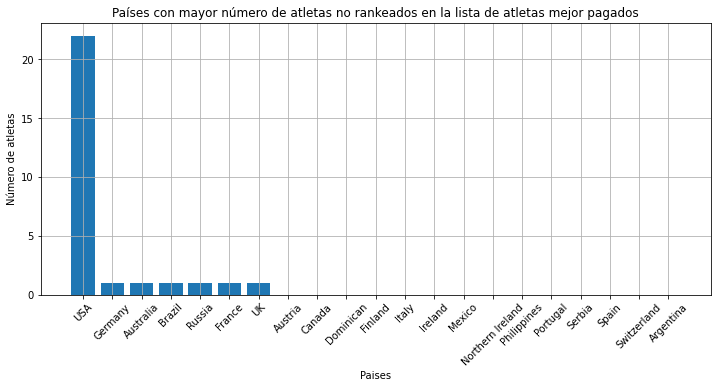

In [176]:
country_no_rank = [country for country, _ in no_rank["Nationality"].value_counts().items()]
country_no_rankC = [register for _, register in no_rank["Nationality"].value_counts().items()]


fig, ax = plt.subplots(figsize = (12, 5))
plt.bar(country_no_rank, country_no_rankC)
plt.xticks(rotation = 45)
plt.grid(True)
plt.title("Países con mayor número de atletas no rankeados en la lista de atletas mejor pagados")
plt.xlabel("Paises")
plt.ylabel("Número de atletas")
plt.show()

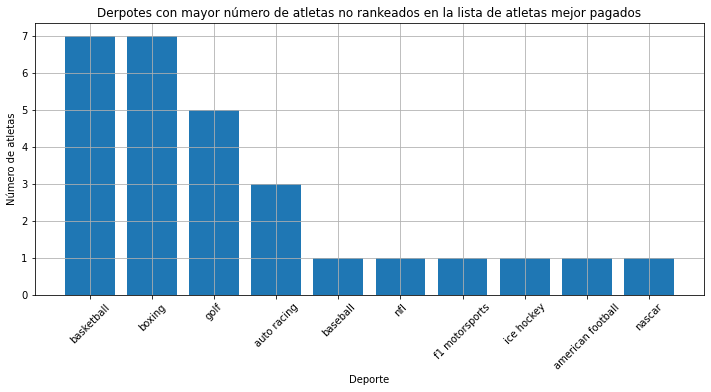

In [177]:
sport_no_rank = [country for country, _ in no_rank["Sport"].value_counts().items()]
sport_no_rankC = [register for _, register in no_rank["Sport"].value_counts().items()]


fig, ax = plt.subplots(figsize = (12, 5))
plt.bar(sport_no_rank, sport_no_rankC)
plt.xticks(rotation = 45)
plt.grid(True)
plt.title("Deportes con mayor número de atletas no rankeados en la lista de atletas mejor pagados")
plt.xlabel("Deporte")
plt.ylabel("Número de atletas")
plt.show()

# País con mayor número de deportes con atletas en el dataset

In [189]:
df.groupby(by = ["Nationality"]).nunique()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
Nationality,,,,,,,
Argentina,1,1,5,7,1,9,9
Australia,1,1,1,1,1,1,1
Austria,1,1,1,1,1,1,1
Brazil,3,1,5,7,2,9,9
Canada,4,1,4,6,4,6,6
Dominican,1,1,1,1,1,1,1
Finland,1,1,3,3,1,3,3
France,1,1,3,3,1,3,3
Germany,1,1,6,7,3,13,13


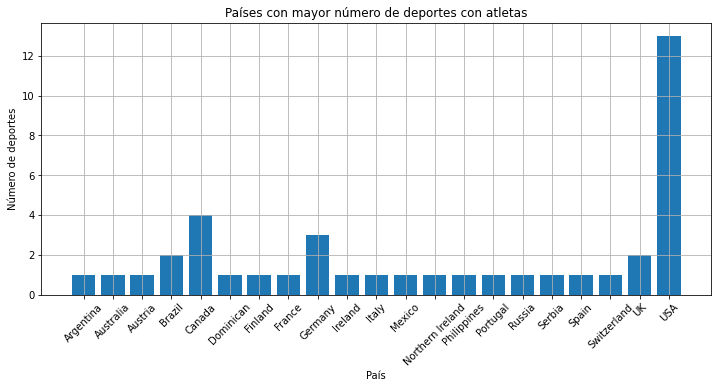

In [237]:
sports_country = df.groupby(by = ["Nationality"])["Sport"].nunique()

sport_c = [country for country, _ in sports_country.items()]
sport_cr = [register for _, register in sports_country.items()]


fig, ax = plt.subplots(figsize = (12, 5))
plt.bar(sport_c, sport_cr)
plt.xticks(rotation = 45)
plt.grid(True)
plt.title("Países con mayor número de deportes con atletas")
plt.xlabel("País")
plt.ylabel("Número de deportes")
plt.show()


# Cuántos atletas por deporte tiene cada país

In [275]:
unique_names = df.drop_duplicates(subset = 'Name')

count_country = unique_names.groupby(by = ['Nationality', 'Sport']).count()

count_country = count_country.dropna()
count_country
count_country = count_country.drop(['Current Rank', 'Previous Year Rank', 'Year', 'earnings ($ million)'], axis = 1)

count_country.columns = ['Total']
count_country


Total
Nationality      Sport                              
Argentina        soccer                          1.0
Australia        golf                            1.0
Austria          auto racing                     1.0
Brazil           auto racing                     1.0
                 soccer                          2.0
Canada           auto racing                     1.0
                 boxing                          1.0
                 hockey                          1.0
                 ice hockey                      1.0
Finland          f1 racing                       1.0
France           auto racing                     1.0
Germany          auto racing                     1.0
Ireland          mma                             1.0
Italy            motorcycle gp                   1.0
Mexico           boxing                          1.0
Northern Ireland golf                            1.0
Philippines      boxing                          1.0
Portugal         soccer                          1.0
Russia           ice hockey                      1.0
Serbia           tennis                          1.0
Spain            tennis                          1.0
Switzerland      tennis                          1.0
UK               auto racing                     2.0
                 soccer                          1.0
USA              american football              14.0
                 american football / baseball    1.0
                 auto racing (nascar)            1.0
                 baseball                        3.0
                 basketball                     11.0
                 boxing                         11.0
                 cycling                         1.0
                 golf                            5.0
                 nascar                          2.0
                 nba                             1.0
                 nfl                             2.0
                 tennis                          3.0

# Ganancia minima y máxima dentro del dataset por deporte y por país

In [288]:
country = df.groupby(by = ['Nationality', 'Sport'])['earnings ($ million)'].max()
country = pd.DataFrame(country)
country = country.dropna(0)

country

earnings ($ million)
Nationality      Sport                                             
Argentina        soccer                                       127.0
Australia        golf                                           8.5
Austria          auto racing                                   13.5
Brazil           auto racing                                   22.0
                 soccer                                       105.0
Canada           auto racing                                   23.0
                 boxing                                        10.2
                 hockey                                        17.9
                 ice hockey                                    14.5
Dominican        baseball                                      35.0
Finland          f1 racing                                     45.0
France           auto racing                                   16.0
Germany          auto racing                                   59.0
                 f1 motorsports                                75.0
                 f1 racing                                     80.0
Ireland          mma                                           99.0
Italy            motorcycle gp                                 35.0
Mexico           boxing                                        94.0
Northern Ireland golf                                          50.0
Philippines      boxing                                       160.0
Portugal         soccer                                       109.0
Russia           ice hockey                                    29.8
Serbia           tennis                                        55.8
Spain            tennis                                        44.5
Switzerland      tennis                                       106.3
UK               auto racing                                   46.0
                 soccer                                        50.0
USA              american football                             89.5
                 american football / baseball                  22.5
                 auto racing                                   26.5
                 auto racing (nascar)                          24.5
                 baseball                                      29.0
                 basketball                                    89.0
                 boxing                                       300.0
                 cycling                                       28.0
                 golf                                         115.0
                 nascar                                        34.0
                 nba                                           15.2
                 nfl                                           16.5
                 tennis                                        28.2

# Atleta con mayores ganacias por deporte por década

In [304]:
ranked_00_10=df[(df['Year']>=2000) & (df['Year']<2010)].loc[:,('Name','Current Rank','Previous Year Rank', 'Year', 'Sport', 'earnings ($ million)')]
ranked_90_00=df[(df['Year']>=1990) & (df['Year']<2000)].loc[:,('Name','Current Rank','Previous Year Rank', 'Year', 'Sport', 'earnings ($ million)')]

## Década 1990-2000

In [367]:
decade1 = ranked_90_00.groupby(by = ['Name', 'Sport'])['earnings ($ million)'].sum()
decade1 = pd.DataFrame(decade1)
decade1 = decade1.dropna(0)
decade1 = decade1.reset_index()
decade1 = decade1.groupby(by = 'Sport').max()
decade1 = decade1.reset_index()
decade1

,Sport,Name,earnings ($ million)
0,american football / baseball,Deion Sanders,22.5
1,auto racing,Nigel Mansell,64.0
2,baseball,Gary Sheffield,17.2
3,basketball,Shaquille O'Neal,409.8
4,boxing,Sugar Ray Leonard,235.1
5,f1 motorsports,Michael Schumacher,106.0
6,golf,Tiger Woods,99.9
7,hockey,Joe Sakic,17.9
8,ice hockey,Wayne Gretzky,29.8
9,nascar,Dale Earnhardt,43.2


## Década 2000-2010

In [368]:
decade2 = ranked_00_10.groupby(by = ['Name', 'Sport'])['earnings ($ million)'].sum()
decade2 = pd.DataFrame(decade2)
decade2 = decade2.dropna(0)
decade2 = decade2.reset_index()
decade2 = decade2.groupby(by = 'Sport').max()
decade2 = decade2.reset_index()
decade2

,Sport,Name,earnings ($ million)
0,american football,Tom Brady,42.0
1,auto racing,Michael Schumacher,59.0
2,auto racing (nascar),Jeff Gordon,24.5
3,baseball,Alex Rodriguez,81.2
4,basketball,Shaquille O'Neal,329.0
5,boxing,Oscar De La Hoya,134.0
6,cycling,Lance Armstrong,28.0
7,f1 motorsports,Michael Schumacher,142.0
8,f1 racing,Michael Schumacher,234.0
9,golf,Tiger Woods,782.3


## Década 2010-2020

In [369]:
decade3 = ranked_10_20.groupby(by = ['Name', 'Sport'])['earnings ($ million)'].sum()
decade3 = pd.DataFrame(decade3)
decade3 = decade3.dropna(0)
decade3 = decade3.reset_index()
decade3 = decade3.groupby(by = 'Sport').max()
decade3 = decade3.reset_index()
decade3

,Sport,Name,earnings ($ million)
0,american football,Terrell Suggs,138.3
1,auto racing,Lewis Hamilton,46.0
2,baseball,Alex Rodriguez,35.0
3,basketball,Stephen Curry,766.8
4,boxing,Manny Pacquiao,840.0
5,f1 racing,Michael Schumacher,34.0
6,golf,Tiger Woods,491.6
7,mma,Conor McGregor,99.0
8,soccer,Neymar,787.1
9,tennis,Roger Federer,746.1


# Ganancia total por cada deporte por cada año

In [373]:
earnings_year = df.groupby(by = ['Sport','Year'])['earnings ($ million)'].sum()
earnings_year = pd.DataFrame(earnings_year)
earnings_year = earnings_year.reset_index()
earnings_year

,Sport,Year,earnings ($ million)
0,american football,2004,42.0
1,american football,2005,37.5
2,american football,2006,29.0
3,american football,2010,78.2
4,american football,2012,42.4
...,...,...,...
171,tennis,2016,123.6
172,tennis,2017,64.0
173,tennis,2018,77.2
174,tennis,2019,93.4
